<a href="https://colab.research.google.com/github/Calaena123/NewRepository/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
print(df2.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
# Fill missing values in 'Age' with the median
df['Age'].fillna(df['Age'].median(), inplace=True)
df2['Age'].fillna(df2['Age'].median(), inplace=True)

print(df.isnull().sum())
print(df2.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64
PassengerId     0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          12
Embarked        0
dtype: int64


In [ ]:
# Drop the 'Cabin' column

df2.drop(columns=['Cabin'], inplace=True)


In [ ]:
print(df.isnull().sum())
print(df2.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Cabin_missing    0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Cabin_missing    0
dtype: int64


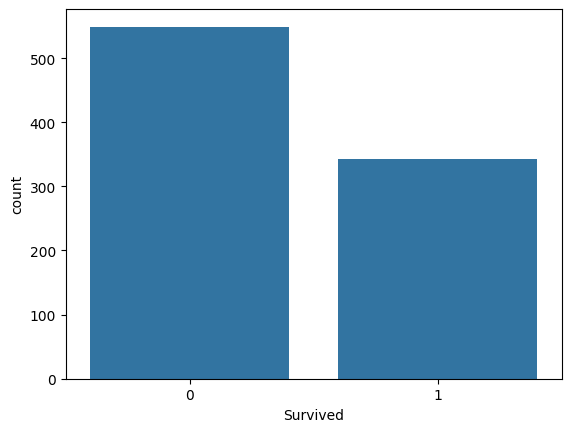

In [ ]:
sns.countplot(x='Survived', data=df)
plt.show()

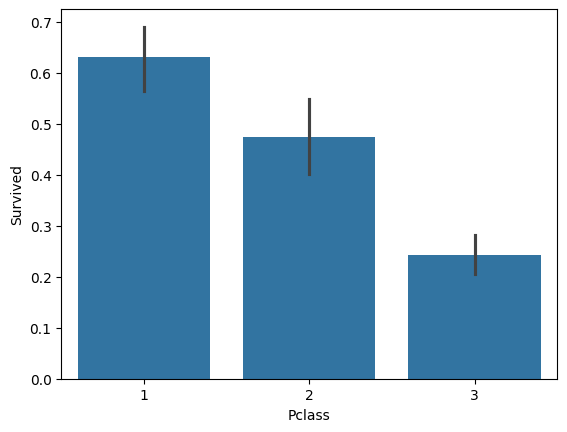

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()


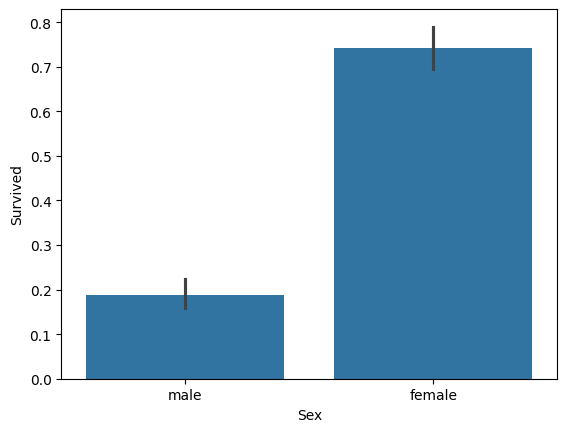

In [ ]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

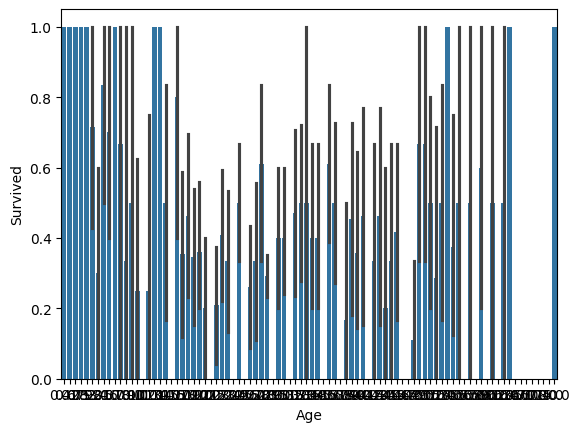

In [ ]:
sns.barplot(x='Age', y='Survived', data=df)
plt.show()

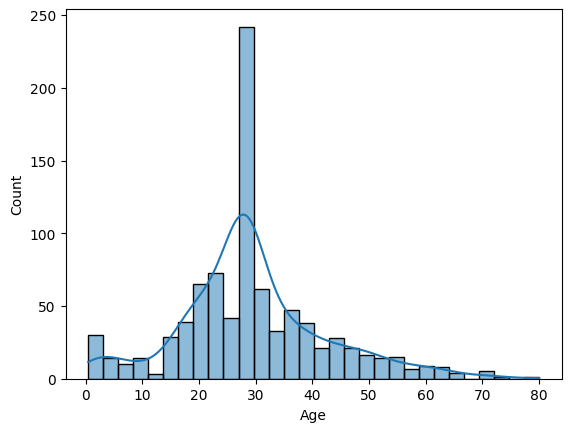

In [ ]:
sns.histplot(df['Age'].dropna(), kde=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']

X = df[features]
y = df['Survived']
# Split the training set into a training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=243)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Validation Accuracy: 82.12%


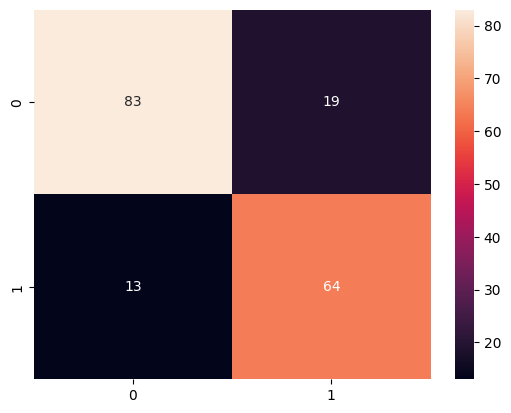

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=90)
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = rf_model.predict(X_val)

# Evaluate model accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Display the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Apply label encoder to the 'Sex' column
df2['Sex'] = le.fit_transform(df2['Sex'])

# Check the transformation
print(df2['Sex'].head())

0    1
1    0
2    1
3    1
4    0
Name: Sex, dtype: int64


In [ ]:
test_features = df2[features]
test_predictions = rf_model.predict(test_features)

In [ ]:
df2['Survived'] = rf_model.predict(test_features)

In [ ]:
# Prepare the final DataFrame with PassengerId and Survived
submission = df2[['PassengerId', 'Survived']]

# Sort by PassengerId if necessary
submission = submission.sort_values(by='PassengerId')
print (submission.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         1
3          895         1
4          896         0


In [ ]:
submission.to_csv('titanic_submission.csv', index=False)
